In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [4]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/222d901d6ba796c5e7ef850a645bea29/asset-v1:hse+STATDA+2021+type@asset+block/StarWars.csv', sep=';')
df.head()

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится
1,3292879538,нет,NaN,М,18-29,0 - 24.999,Юго-Западный центральный,NaN,NaN
2,3292765271,да,нет,М,18-29,0 - 24.999,Северо-Западный центральный,не знаю такого персонажа,нравится
3,3292763116,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,очень нравится,очень нравится
4,3292731220,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,нравится,нравится


Вопрос 1. <br> Постройте таблицу сопряженности для переменных gender и fan. Укажите, верно ли следующее утверждение: 120 мужчин являются фанатами серии фильмов «Звездные войны».

In [9]:
ct_o = df.groupby('gender')['fan'].value_counts().unstack()
ct_o

fan,да,нет
gender,,
Ж,238,159
М,303,120


Вопрос 2. <br> Чему равна оценка вероятности того, что человек является фанатом серии фильмов? Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой.

In [15]:
n_total = ct_o.sum().sum()
n_total

820

In [12]:
ct_o['да'].sum() / total

0.6597560975609756

Вопрос 3. <br> Чему равна теоретическая частота для женщин, которые являются фанатами серии фильмов? В ответ запишите число, округлите до целого.

In [13]:
scipy.stats.chi2_contingency(ct_o, correction=False)

Chi2ContingencyResult(statistic=12.449350493035466, pvalue=0.00041813719910750865, dof=1, expected_freq=array([[261.92317073, 135.07682927],
       [279.07682927, 143.92317073]]))

In [17]:
n_target_yes = ct_o['да'].sum()
n_target_no = ct_o['нет'].sum()

p_target_0 = n_target_yes / n_total
p_target_1 = n_target_no / n_total

n_women = ct_o.iloc[0].sum()
n_men = ct_o.iloc[1].sum()

f_e_target_0_women = n_women * p_target_0
f_e_target_1_women = n_women * p_target_1

f_e_target_0_men = n_men * p_target_0
f_e_target_1_men = n_men * p_target_1

print(f_e_target_0_women + f_e_target_1_women + f_e_target_0_men + f_e_target_1_men)

ct_e = np.array([[f_e_target_0_women, f_e_target_1_women], [f_e_target_0_men, f_e_target_1_men]])

chi_square = ((ct_o - ct_e)**2/ct_e).sum().sum()
print(chi_square)

820.0
12.449350493035455


In [41]:
X = np.array([23, 3, 11, 35, -3, -10])
Y = np.array([29, 1, 20, 3, 0, 0])
scipy.stats.ttest_rel(X, Y)

TtestResult(statistic=0.15504341823651055, pvalue=0.8828516345668911, df=5)

In [26]:
n_1 = len(X)
n_2 = len(Y)

In [24]:
var_1 = X.var()

In [25]:
var_2 = Y.var()

In [27]:
mean_1 = X.mean()
mean_2 = Y.mean()

In [28]:
s_m1_m2 = np.sqrt(var_1/n_1 + var_2/n_2)
t = (mean_1 - mean_2) / s_m1_m2

In [29]:
t

0.12804659847098984

In [36]:
X = np.array([13, 0, 6, 9, -1, 0])
Y = np.array([4, 1, 5, 1, 20, 0])

In [37]:
n_1 = len(X)
n_2 = len(Y)
var_1 = X.var()
var_2 = Y.var()
mean_1 = X.mean()
mean_2 = Y.mean()
s_m1_m2 = np.sqrt(var_1/n_1 + var_2/n_2)
t = (mean_1 - mean_2) / s_m1_m2

In [38]:
t

-0.18891196982194502

In [39]:
scipy.stats.ttest_ind(X, Y, equal_var=False)

Ttest_indResult(statistic=-0.1724522454236908, pvalue=0.866753894833007)

In [43]:
X = np.array([3, 2, 98, 34, 11, 2])
m_0 = 7

${\displaystyle t={\frac {{\overline {X}}-m}{s_{X}/{\sqrt {n}}}}.}$

In [45]:
t = (X.mean() - m_0) / (X.std() / np.sqrt(len(X)))
t

1.2774134470551823

In [47]:
X.std() 

34.515696912177994

In [46]:
X.mean()

25.0

In [48]:
18 / (34.52 / np.sqrt(6))

1.2772542111847394

TEST

In [49]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/602c0edd7a26c6611744a380a3130736/asset-v1:hse+STATDA+2021+type@asset+block/UrbanizationCensusTract.csv')

In [50]:
df

,Unnamed: 0,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex,log_pop
0,0,1,Alabama,G0100010020100,32.47718,-86.49007,1845,44076.0,10.69367,7.520235
1,1,1,Alabama,G0100010020200,32.47425,-86.47337,2172,43008.0,10.66914,7.683404
2,2,1,Alabama,G0100010020300,32.47543,-86.46019,3385,38987.0,10.57098,8.127109
3,3,1,Alabama,G0100010020400,32.47200,-86.44363,4267,43131.0,10.67200,8.358666
4,4,1,Alabama,G0100010020500,32.45883,-86.42266,9965,43131.0,10.67200,9.206834
...,...,...,...,...,...,...,...,...,...,...
73275,73275,72,Puerto Rico,G7201530750501,18.03124,-66.86725,6011,52155.0,10.86198,8.701346
73276,73276,72,Puerto Rico,G7201530750502,18.02477,-66.86044,2342,55257.0,10.91975,7.758761
73277,73277,72,Puerto Rico,G7201530750503,18.02527,-66.87763,2218,48423.0,10.78773,7.704361
73278,73278,72,Puerto Rico,G7201530750601,18.01738,-66.83936,4380,50600.0,10.83171,8.384804


Вопрос 1 <br> Сравните дисперсии по переменной log_pop в штатах Вайоминг (Wyoming) и Южная Дакота (South Dakota). Укажите, верно ли следующее утверждение: полученные дисперсии равны.

In [56]:
var_1 = df[df['state'] == 'Wyoming']['log_pop'].var()
var_1

0.18517126178551702

In [57]:
var_2 = df[df['state'] == 'South Dakota']['log_pop'].var()
var_2

0.24738635408141224

In [58]:
n_1 = df[df['state'] == 'Wyoming']['log_pop'].count()
n_1

131

In [59]:
n_2 = df[df['state'] == 'South Dakota']['log_pop'].count()
n_2

219

Чему будет равно количество степеней свободы для указанной выше переменной и штатов с поправкой Уэлча? Рассчитайте показатель вручную.

### Поправка Уэлча
$
\begin{align}
df = \frac{(V_1 + V_2)^2}{\frac{V^2_1}{n_1 - 1} + \frac{V^2_2}{n_2 - 1}}
\end{align}
$

$
V_1 = \frac{s^2_1}{n_1}
$

$
V_2 = \frac{s^2_2}{n_2}
$

In [69]:
v_1 = var_1/n_1
v_2 = var_2/n_2

df_welch = (v_1 + v_2)**2 / (v_1**2 / (n_1 - 1) + v_2**2 / (n_2 - 1))
df_welch

304.7437699318602

Вопрос 2 <br> Чему равна стандартная ошибка для выбранных выше штатов и переменной? Выберите один верный ответ.

In [60]:
s_m1_m2 = np.sqrt(var_1/n_1 + var_2/n_2)
s_m1_m2

0.05042954627496124

Вопрос 3 <br> Чему равна разность между средними выборок по указанным выше штатам? Выберите один верный ответ.

In [63]:
mean_1 = df[df['state'] == 'Wyoming']['log_pop'].mean()
mean_2 = df[df['state'] == 'South Dakota']['log_pop'].mean()
mean_1 - mean_2

0.17812507657674104

Вопрос 4 <br> Чему получилось равно t-значение для указанных выше штатов и переменной log_pop ? Введите ответ в виде модуля десятичной дроби, округлите до двух знаков после запятой.

In [62]:
scipy.stats.ttest_ind(df[df['state'] == 'Wyoming']['log_pop'], df[df['state'] == 'South Dakota']['log_pop'], equal_var=False)

Ttest_indResult(statistic=3.5321570336075356, pvalue=0.00047596931710874944)

Вопрос 5 <br> Чему получилось равно t-критическое для уровня значимости 0.01? Введите ответ в виде десятичной дроби, округлите до двух знаков после запятой.

In [64]:
t_critical = 2.59

Вопрос 6 <br> Рассчитайте доверительный интервал для разницы между средними по указанным штатам и переменной. Какое из следующих утверждений верно? Выберите один верный ответ.

In [65]:
CI_bottom = (mean_1 - mean_2) - t_critical * s_m1_m2
CI_top = (mean_1 - mean_2) + t_critical * s_m1_m2

In [66]:
CI_bottom

0.04751255172459143

In [67]:
CI_top

0.3087376014288906

<b>Линейная регрессия - Тест </b> 

Вопрос 1 <br>Предположим, что X и Y заданы так: X = [3, 2, 98, 34, 11, 2, 3], Y = [2, 1, 0, 3, 7, 2, 15]. Постройте модель линейной регрессии. Чему будет равно предсказанное значение зависимой переменной, если значение объясняющей равно 0? Выберите один верный ответ.

In [71]:
X = np.array([3, 2, 98, 34, 11, 2, 3])
y = np.array([2, 1, 0, 3, 7, 2, 15])
scipy.stats.linregress(X, y)

LinregressResult(slope=-0.05549678881752928, intercept=5.498715527011711, rvalue=-0.37752595143732137, pvalue=0.4037712769297895, stderr=0.06087606348645353, intercept_stderr=2.4029802304891703)

In [73]:
X_simple_constant = sm.add_constant(X)
model = sm.OLS(y, X_simple_constant)
res_simple = model.fit()
res_simple.summary()

c:\users\kdk\appdata\local\programs\python\python38\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.8311
Date:                Tue, 25 Jul 2023   Prob (F-statistic):              0.404
Time:                        23:20:43   Log-Likelihood:                -20.421
No. Observations:                   7   AIC:                             44.84
Df Residuals:                       5   BIC:                             44.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4987      2.403      2.288      0.071      -0.678      11.676
x1            -0.0555      0.061     -0.912      0.404      -0.212       0.101
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.629
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.715
Skew:                           1.200   Prob(JB):                        0.424
Kurtosis:                       3.344   Cond. No.                         47.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Вопрос 2 <br>Предположим, что X и Y заданы так: X = [3, 2, 98, 34, 11, 2, 3], Y = [2, 1, 0, 3, 7, 2, 15]. На сколько будет увеличиваться предсказанное значение Y при увеличении X на 1? Выберите один верный ответ.

In [87]:
X = np.array([3, 2, 98, 34, 11, 2, 3])
y = np.array([2, 1, 0, 3, 7, 2, 15])
res = scipy.stats.linregress(X, y)
res

LinregressResult(slope=-0.05549678881752928, intercept=5.498715527011711, rvalue=-0.37752595143732137, pvalue=0.4037712769297895, stderr=0.06087606348645353, intercept_stderr=2.4029802304891703)

In [75]:
X_simple_constant = sm.add_constant(X)
model = sm.OLS(y, X_simple_constant)
res_simple = model.fit()
res_simple.summary()

c:\users\kdk\appdata\local\programs\python\python38\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.8311
Date:                Tue, 25 Jul 2023   Prob (F-statistic):              0.404
Time:                        23:31:48   Log-Likelihood:                -20.421
No. Observations:                   7   AIC:                             44.84
Df Residuals:                       5   BIC:                             44.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4987      2.403      2.288      0.071      -0.678      11.676
x1            -0.0555      0.061     -0.912      0.404      -0.212       0.101
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.629
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.715
Skew:                           1.200   Prob(JB):                        0.424
Kurtosis:                       3.344   Cond. No.                         47.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
y_reg = res.intercept + res.slope * X
y_reg

array([5.33222516, 5.38772195, 0.06003022, 3.61182471, 4.88825085,
       5.38772195, 5.33222516])

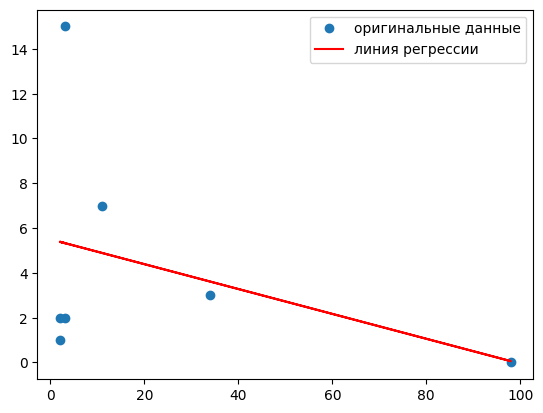

In [89]:
plt.plot(X, y, 'o', label='оригинальные данные')
plt.plot(X, y_reg, 'r', label='линия регрессии')
plt.legend()
plt.show()

In [91]:
MSE = ((y - y_reg) ** 2).sum() / len(y)
MSE

20.019396621512225

In [92]:
MAE = (abs(y-y_reg)).sum() / len(y)
MAE

3.3655782826919967

Вопрос 3 <br>Предположим, что X и Y заданы так: X = [3, 2, 98, 34, 11, 2, 3], Y = [2, 1, 0, 3, 7, 2, 15]. Постройте модель линейной регрессии. Укажите, верно ли следующее утверждение: значение коэффициента детерминации в данной модели получилось 0.14, значит модель объясняет 76% разброса данных.

In [93]:
X = np.array([3, 2, 98, 34, 11, 2, 3])
y = np.array([2, 1, 0, 3, 7, 2, 15])
res = scipy.stats.linregress(X, y)
res

LinregressResult(slope=-0.05549678881752928, intercept=5.498715527011711, rvalue=-0.37752595143732137, pvalue=0.4037712769297895, stderr=0.06087606348645353, intercept_stderr=2.4029802304891703)

In [94]:
res.rvalue ** 2

0.14252584400865473